In [5]:
import cv2
import pandas as pd
import torch
import numpy as np
from PIL import Image
from yolov5.models.experimental import attempt_load
from class_mapping import yolo_class_mapping
from perform_object import perform_object
from convert_data import collect_coordinates
from create_polygon import check_polylist

### Check opencv version

In [2]:
print('opencv version: ', cv2.__version__)

opencv version:  4.8.0


### Load Model

In [3]:
device = torch.device('cpu')

# Load trained YOLOv5 model weights
yolo_weights_path = '/Users/bongeungu/Desktop/kfq/KFQ_TEAM01/yolo/models/yolov5m.pt'

yolo_model = attempt_load(yolo_weights_path, device=device)

Fusing layers... 
YOLOv5m summary: 369 layers, 21190557 parameters, 0 gradients


### Create polygon using road boundary coordinates data

      X1   Y1    X2   Y2 Class_Name
0    294  366  1478  747        bus
1    139  355  1353  754        bus
2     -4  363  1218  755        bus
3      0  365  1106  756        bus
4      5  379   980  757        bus
..   ...  ...   ...  ...        ...
124    2  372   828  756        bus
125    1  385   706  763        bus
126    2  375   538  765        bus
127    0  377   480  769        bus
128    0  388   260  745        bus

[129 rows x 5 columns]
coodrinates count: 129


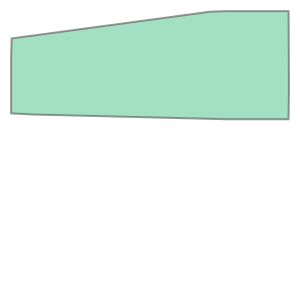

In [6]:
# Initialize webcam
cap = cv2.VideoCapture(0)

columns = ['X1', 'Y1', 'X2', 'Y2', 'Class_Name']
road_coordinates = pd.DataFrame(columns=columns)
sidewalk_coordinates = pd.DataFrame(columns=columns)

for i in range(400):
    ret, frame = cap.read()
    
    image = Image.fromarray(frame)
    image = image.resize((640,640))
    image_tensor = torch.from_numpy(np.array(image)).float().permute(2, 0, 1) / 255.0
    image_tensor = image_tensor.unsqueeze(0).to(device)
    
    results = perform_object(image_tensor, 0.65, yolo_model)
    road_coordinates, sidewalk_coordinates = collect_coordinates(results, frame, yolo_class_mapping, road_coordinates, sidewalk_coordinates)

cap.release()
print(road_coordinates)
print(f'coodrinates count: {len(road_coordinates)}')

# Create road boundary polygon using road coordinates data
polygon = check_polylist(road_coordinates)
polygon